# Initial Data Exploration

## About Dataset

This dataset contains booking information for both a city hotel and a resort hotel. It includes details such as the booking date, length of stay, number of adults, children, and babies, as well as the number of available parking spaces, among other variables.

All personally identifiable information has been removed from the data.

**Acknowledgements**
The data is originally from the article "Hotel Booking Demand Datasets," written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

Thomas Mock and Antoine Bichat downloaded and cleaned the data for #TidyTuesday during the week of February 11th, 2020.

For more information visit: [hotel-booking-demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

## Exploratory Data Analysis

### Setup

In [37]:
## Import of libraries

# Standard libraries
import pandas as pd
import numpy as np
from itertools import product

# Ploting
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
# import plotly.io as pio
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Profiling
from ydata_profiling import ProfileReport
import scipy.stats as ss

# Sklearn related



# For reproducibility purposes, define SEED for random_state. 
sns.set_palette("colorblind")
SEED = 42


### Load Dataset

In [38]:
# Read the dataset 
dataset_path = "../data/raw/hotel_bookings.csv"
hotel_df = pd.read_csv(dataset_path)
hotel_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### Build Profile Report

This report is built using a library called pandas_profiling. It automates many graphs and summary tables used in Exploratory Data Analysis (EDA). It is useful as a tool, but in practice, it is not sufficient; you need to continue exploring the data in more detail. For this project, it is a good starting point. If you want to learn more, you can check the [documentation](https://docs.profiling.ydata.ai/latest/).

In [3]:
# This will generate a profilling report. Execute this just one time. 
reports_path = "../reports/"
profile=ProfileReport(hotel_df, title="Hotel Bookings Data Profiling Report")
profile.to_file(reports_path+"profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Check Imbalanced Data & Remove Duplicates

In [39]:
hotel_df = hotel_df.drop_duplicates()

In [45]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [44]:
cancelations_df = (hotel_df
     .groupby(['is_canceled'])
     .size()
     .reset_index(name = 'n_reservaciones')
     .assign(percentage = lambda df_: df_.n_reservaciones / df_.n_reservaciones.sum() * 100)
     
     .round(1)
)

cancel_map = {0: 'Not Canceled', 1: 'Canceled'}
cancelations_df['cancel_cat']= cancelations_df['is_canceled'].map(cancel_map)

fig = px.pie(
    cancelations_df, 
    values='percentage', 
    names='cancel_cat', 
    title='Cancelation Rate Disparity Across Bookings',  
    labels={'cancel_cat':'Status'},
    color_discrete_sequence=px.colors.qualitative.T10,
    )
fig.show()
# pio.write_image(fig, 'ntbk1_0_xc-CancelationRateDisparity.png')


### Check Data Distribution

In [29]:
# Separate numerical data from categorical data
num_data = hotel_df.select_dtypes(exclude=['object', 'bool'])
num_data.head()


is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3    NaN      NaN   
1                               0                4    NaN      NaN   
2                               0                0    NaN      NaN   
3                               0                0  304.0      NaN   
4                               0                0  240.0      NaN   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [30]:
# Separate numerical data from categorical data
cat_data = hotel_df.select_dtypes(include=['object', 'bool'])

# - Dropping 'reservation_status' as it is a 1:1 relation with 'is_canceled'
# - Dropping 'arrival_date_month' status as it is a 1:1 relation with 'arrival_date_week_number',
# but the last one give us ordinality information
cat_data = cat_data.drop(columns=['arrival_date_month', 'reservation_status', 'reservation_status_date'])
cat_data['is_canceled'] = hotel_df['is_canceled'].map({0:'NotCanceled', 1:'Canceled'})
cat_data.head()

hotel meal country market_segment distribution_channel  \
0  Resort Hotel   BB     PRT         Direct               Direct   
1  Resort Hotel   BB     PRT         Direct               Direct   
2  Resort Hotel   BB     GBR         Direct               Direct   
3  Resort Hotel   BB     GBR      Corporate            Corporate   
4  Resort Hotel   BB     GBR      Online TA                TA/TO   

  reserved_room_type assigned_room_type deposit_type customer_type  \
0                  C                  C   No Deposit     Transient   
1                  C                  C   No Deposit     Transient   
2                  A                  C   No Deposit     Transient   
3                  A                  A   No Deposit     Transient   
4                  A                  A   No Deposit     Transient   

   is_canceled  
0  NotCanceled  
1  NotCanceled  
2  NotCanceled  
3  NotCanceled  
4  NotCanceled

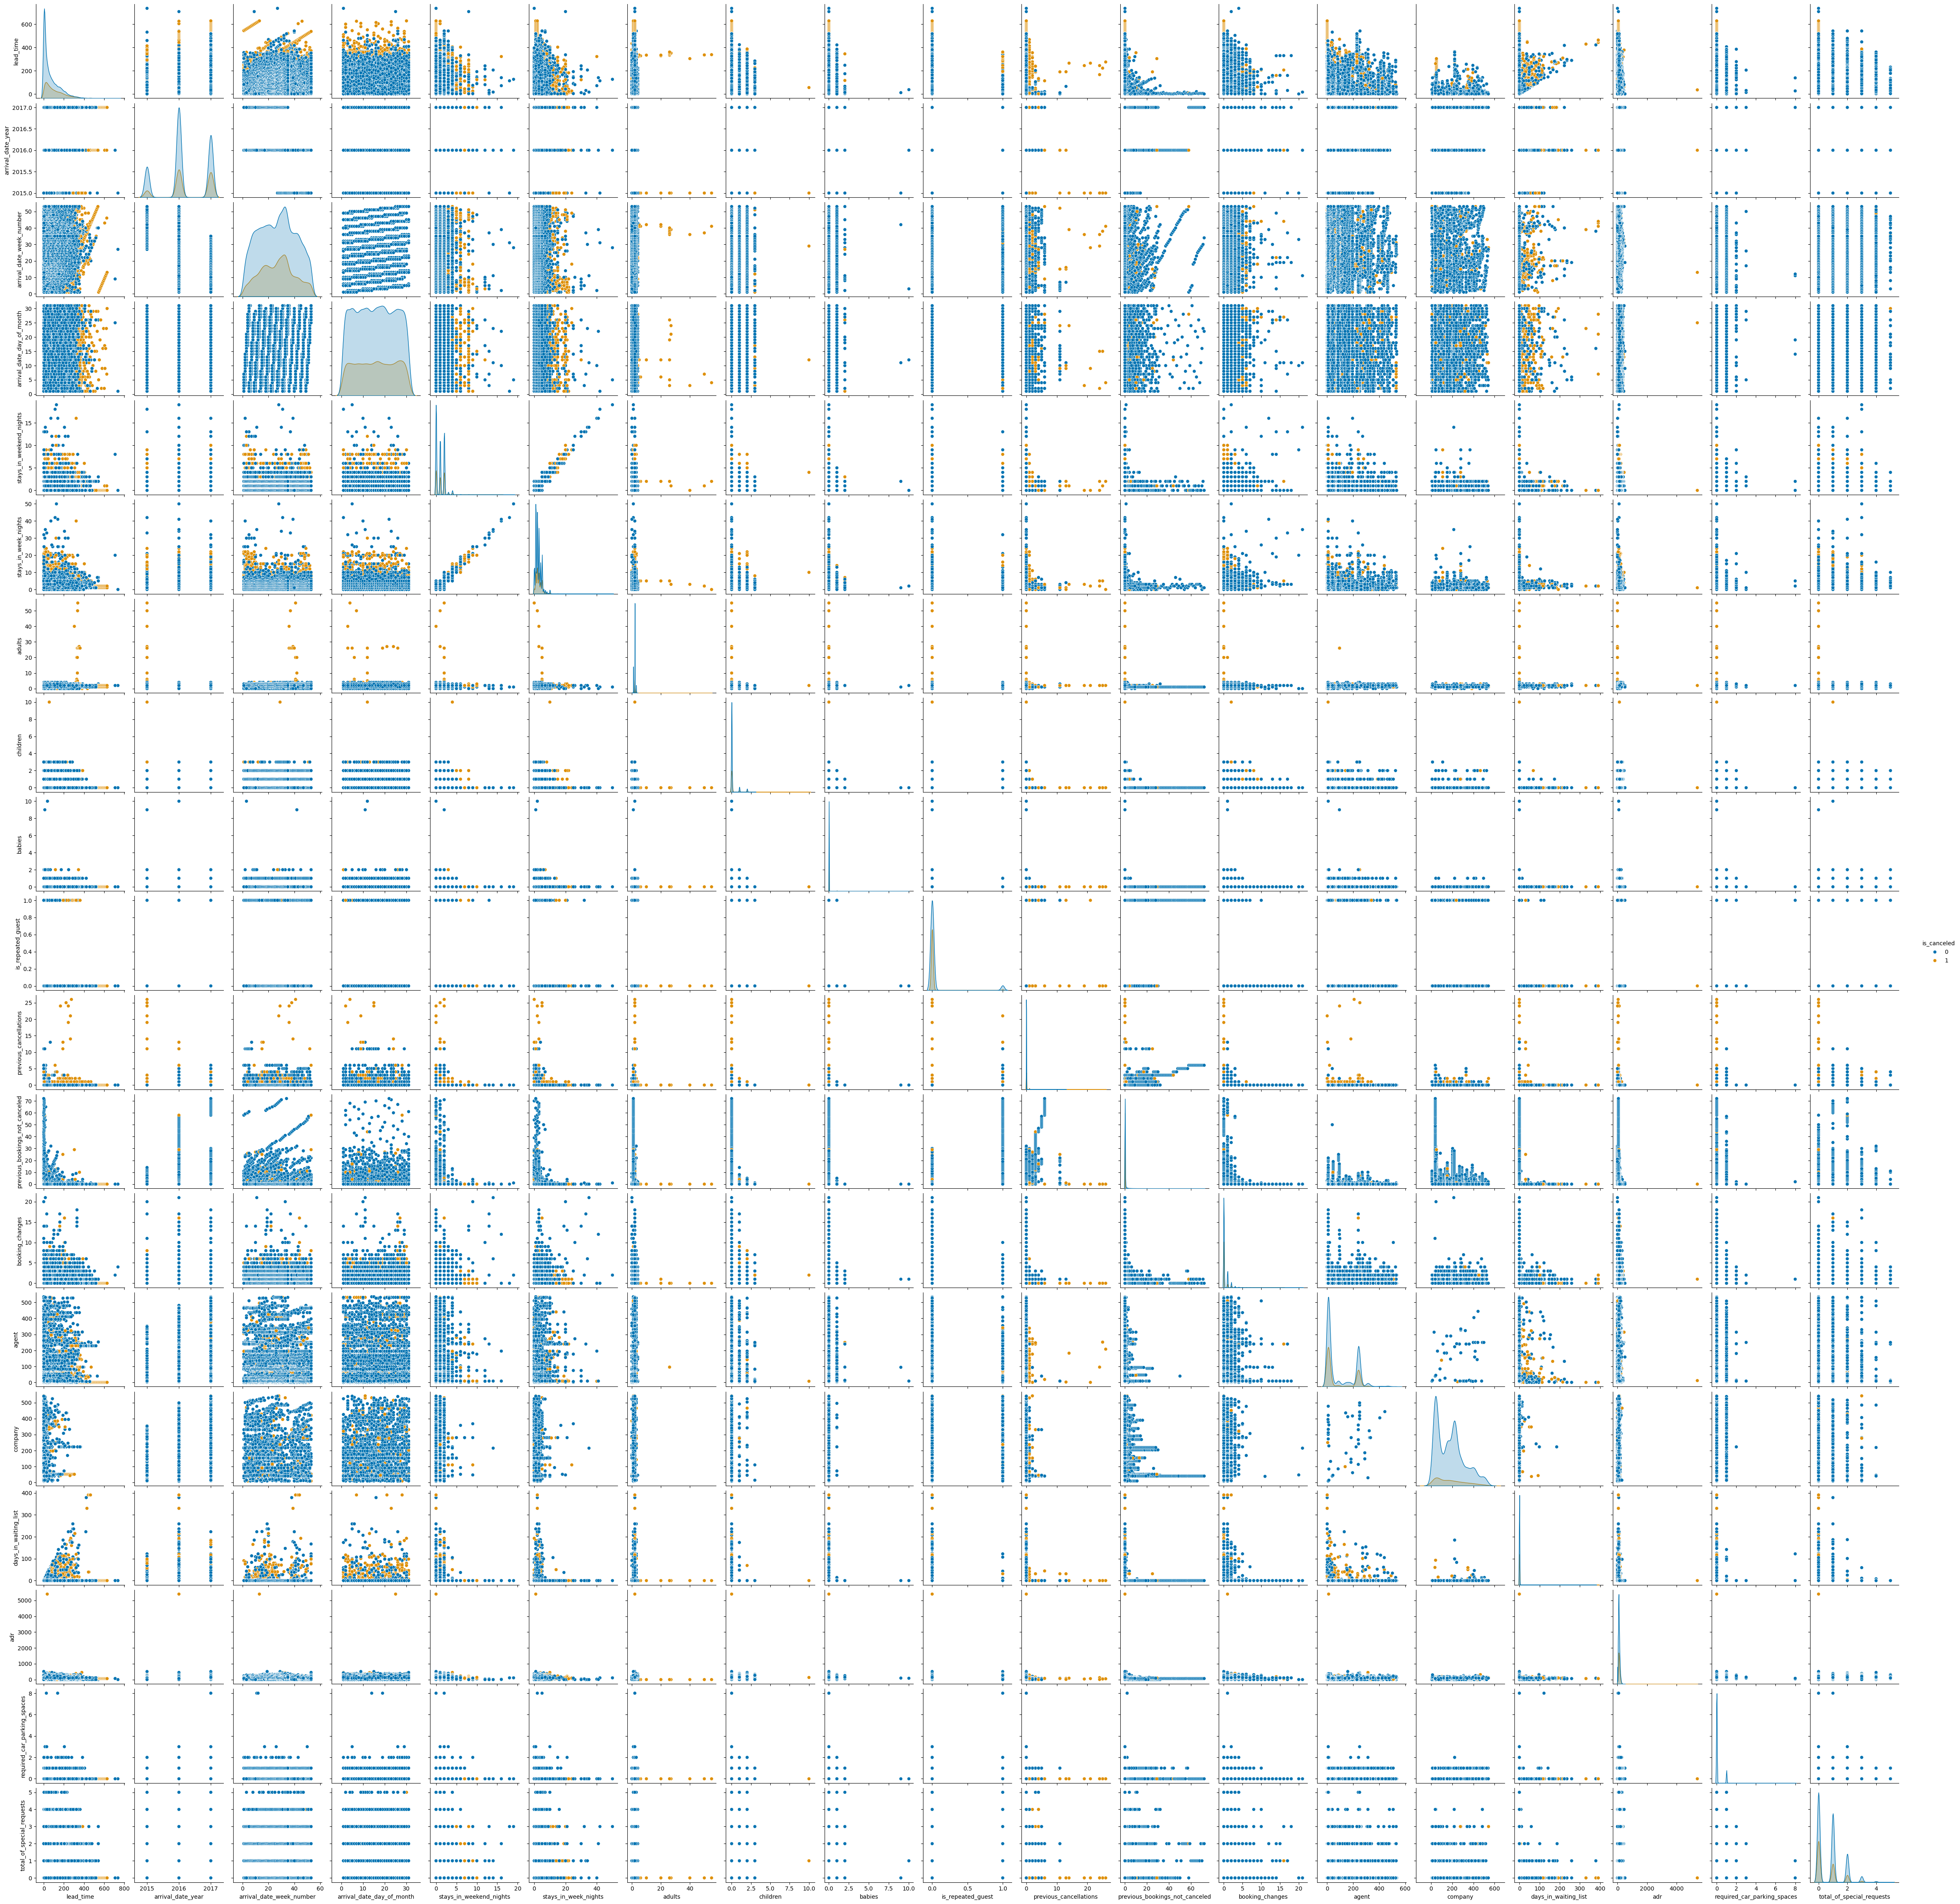

In [36]:
sns.pairplot(num_data, hue="is_canceled")

#### Correlation Beetween Numerical Variables

In [31]:
corr = num_data.corr()
corr

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.184806           0.088030   
lead_time                          0.184806   1.000000           0.139135   
arrival_date_year                  0.088030   0.139135           1.000000   
arrival_date_week_number           0.001443   0.101150          -0.514228   
arrival_date_day_of_month          0.005328   0.009866          -0.010023   
stays_in_weekend_nights            0.060191   0.235145           0.005144   
stays_in_week_nights               0.082928   0.310129           0.003645   
adults                             0.081816   0.140493           0.038619   
children                           0.067396   0.028638           0.041137   
babies                            -0.020543  -0.003614          -0.023334   
is_repeated_guest                 -0.089643  -0.147003           0.024343   
previous_cancellations             0.051468   0.005375          -0.054212   
previous_bookings_not_canceled    -0.052154  -0.078931           0.027256   
booking_changes                   -0.093644   0.077028           0.008604   
agent                             -0.044359   0.023698          -0.020110   
company                            0.009040   0.143630           0.250194   
days_in_waiting_list               0.004464   0.132152          -0.027939   
adr                                0.127986   0.023564           0.176088   
required_car_parking_spaces       -0.184206  -0.086541          -0.039807   
total_of_special_requests         -0.120545   0.034240           0.064268   

                                arrival_date_week_number  \
is_canceled                                     0.001443   
lead_time                                       0.101150   
arrival_date_year                              -0.514228   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.093594   
stays_in_weekend_nights                         0.026868   
stays_in_week_nights                            0.027801   
adults                                          0.024362   
children                                        0.013456   
babies                                          0.014260   
is_repeated_guest                              -0.036860   
previous_cancellations                          0.007199   
previous_bookings_not_canceled                 -0.020819   
booking_changes                                 0.011902   
agent                                           0.017685   
company                                        -0.093838   
days_in_waiting_list                            0.013843   
adr                                             0.098279   
required_car_parking_spaces                     0.008946   
total_of_special_requests                       0.046599   

                                arrival_date_day_of_month  \
is_canceled                                      0.005328   
lead_time                                        0.009866   
arrival_date_year                               -0.010023   
arrival_date_week_number                         0.093594   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.017803   
stays_in_week_nights                            -0.028190   
adults                                          -0.001125   
children                                         0.015807   
babies                                          -0.000393   
is_repeated_guest                               -0.004178   
previous_cancellations                          -0.008538   
previous_bookings_not_canceled                   0.000152   
booking_changes                                  0.006307   
agent                                            0.008830   
company                                          0.031916   
days_in_waiting_list                             0.006588   
adr                                              0.0225

In [32]:
# Create a heatmap using Plotly
fig = px.imshow(corr, 
                text_auto=True, 
                color_continuous_scale='Viridis', 
                title='Correlation Matrix')

# Show the plot
fig.show()

### Correlation Beetween Categorical Features using Chi Square Test

In [33]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   hotel                 87396 non-null  object
 1   meal                  87396 non-null  object
 2   country               86944 non-null  object
 3   market_segment        87396 non-null  object
 4   distribution_channel  87396 non-null  object
 5   reserved_room_type    87396 non-null  object
 6   assigned_room_type    87396 non-null  object
 7   deposit_type          87396 non-null  object
 8   customer_type         87396 non-null  object
 9   is_canceled           87396 non-null  object
dtypes: object(10)
memory usage: 7.3+ MB


In [34]:
cat_var = [var for var in cat_data.columns]
cat_var_prod = list(product(cat_var,cat_var, repeat = 1))
cat_var_prod

[('hotel', 'hotel'),
 ('hotel', 'meal'),
 ('hotel', 'country'),
 ('hotel', 'market_segment'),
 ('hotel', 'distribution_channel'),
 ('hotel', 'reserved_room_type'),
 ('hotel', 'assigned_room_type'),
 ('hotel', 'deposit_type'),
 ('hotel', 'customer_type'),
 ('hotel', 'is_canceled'),
 ('meal', 'hotel'),
 ('meal', 'meal'),
 ('meal', 'country'),
 ('meal', 'market_segment'),
 ('meal', 'distribution_channel'),
 ('meal', 'reserved_room_type'),
 ('meal', 'assigned_room_type'),
 ('meal', 'deposit_type'),
 ('meal', 'customer_type'),
 ('meal', 'is_canceled'),
 ('country', 'hotel'),
 ('country', 'meal'),
 ('country', 'country'),
 ('country', 'market_segment'),
 ('country', 'distribution_channel'),
 ('country', 'reserved_room_type'),
 ('country', 'assigned_room_type'),
 ('country', 'deposit_type'),
 ('country', 'customer_type'),
 ('country', 'is_canceled'),
 ('market_segment', 'hotel'),
 ('market_segment', 'meal'),
 ('market_segment', 'country'),
 ('market_segment', 'market_segment'),
 ('market_segm

In [14]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append(
            (i[0], i[1], 
             list(
                ss.chi2_contingency(
                    pd.crosstab(hotel_cat[i[0]], hotel_cat[i[1]])
                    )
                )[1]
            )
        )
result

[('hotel', 'meal', 0.0),
 ('hotel', 'country', 0.0),
 ('hotel', 'market_segment', 0.0),
 ('hotel', 'distribution_channel', 0.0),
 ('hotel', 'reserved_room_type', 0.0),
 ('hotel', 'assigned_room_type', 0.0),
 ('hotel', 'deposit_type', 1.078277017042173e-61),
 ('hotel', 'customer_type', 1.1741931265118952e-70),
 ('hotel', 'is_canceled', 2.325877630100099e-99),
 ('meal', 'hotel', 0.0),
 ('meal', 'country', 0.0),
 ('meal', 'market_segment', 0.0),
 ('meal', 'distribution_channel', 0.0),
 ('meal', 'reserved_room_type', 0.0),
 ('meal', 'assigned_room_type', 0.0),
 ('meal', 'deposit_type', 6.693014372153153e-37),
 ('meal', 'customer_type', 0.0),
 ('meal', 'is_canceled', 1.244958118704273e-74),
 ('country', 'hotel', 0.0),
 ('country', 'meal', 0.0),
 ('country', 'market_segment', 0.0),
 ('country', 'distribution_channel', 0.0),
 ('country', 'reserved_room_type', 1.842812123745208e-189),
 ('country', 'assigned_room_type', 1.561844747664404e-104),
 ('country', 'deposit_type', 9.439336782475192e-28

In [15]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
p_values = chi_test_output.pivot(index='var1', columns='var2', values='coeff')
p_values

var2                  assigned_room_type        country  customer_type  \
var1                                                                     
assigned_room_type                   NaN  1.561845e-104   0.000000e+00   
country                    1.561845e-104            NaN   0.000000e+00   
customer_type               0.000000e+00   0.000000e+00            NaN   
deposit_type               2.928820e-126  9.439337e-288   4.157761e-91   
distribution_channel        0.000000e+00   0.000000e+00   0.000000e+00   
hotel                       0.000000e+00   0.000000e+00   1.174193e-70   
is_canceled                4.740419e-161   0.000000e+00  1.092784e-305   
market_segment              0.000000e+00   0.000000e+00   0.000000e+00   
meal                        0.000000e+00   0.000000e+00   0.000000e+00   
reserved_room_type          0.000000e+00  1.842812e-189   0.000000e+00   

var2                   deposit_type  distribution_channel         hotel  \
var1                                                                      
assigned_room_type    2.928820e-126          0.000000e+00  0.000000e+00   
country               9.439337e-288          0.000000e+00  0.000000e+00   
customer_type          4.157761e-91          0.000000e+00  1.174193e-70   
deposit_type                    NaN          1.681541e-47  1.078277e-61   
distribution_channel   1.681541e-47                   NaN  0.000000e+00   
hotel                  1.078277e-61          0.000000e+00           NaN   
is_canceled            0.000000e+00          0.000000e+00  2.325878e-99   
market_segment         0.000000e+00          0.000000e+00  0.000000e+00   
meal                   6.693014e-37          0.000000e+00  0.000000e+00   
reserved_room_type     1.203239e-77          0.000000e+00  0.000000e+00   

var2                    is_canceled  market_segment          meal  \
var1                                                                
assigned_room_type    4.740419e-161             0.0  0.000000e+00   
country                0.000000e+00             0.0  0.000000e+00   
customer_type         1.092784e-305             0.0  0.000000e+00   
deposit_type           0.000000e+00             0.0  6.693014e-37   
distribution_channel   0.000000e+00             0.0  0.000000e+00   
hotel                  2.325878e-99             0.0  0.000000e+00   
is_canceled                     NaN             0.0  1.244958e-74   
market_segment         0.000000e+00             NaN  0.000000e+00   
meal                   1.244958e-74             0.0           NaN   
reserved_room_type     1.168829e-58             0.0  0.000000e+00   

var2                  reserved_room_type  
var1                                      
assigned_room_type          0.000000e+00  
country                    1.842812e-189  
customer_type               0.000000e+00  
deposit_type                1.203239e-77  
distribution_channel        0.000000e+00  
hotel                       0.000000e+00  
is_canceled                 1.168829e-58  
market_segment              0.000000e+00  
meal                        0.000000e+00  
reserved_room_type                   NaN

In [16]:
# Apply a logarithmic transformation to the p-values
log_p_values = -np.log10(p_values)

# Set zmin and zmax for the transformed values
zmin = log_p_values.values[np.isfinite(log_p_values.values)].min()
zmax = log_p_values.values[np.isfinite(log_p_values.values)].max()

# Create a heatmap
fig = px.imshow(log_p_values,
                labels=dict(x="Variable", y="Variable", color="P-value"),
                x=log_p_values.columns,
                y=log_p_values.index,
                color_continuous_scale='Viridis',
                title='Heatmap of Chi-Square Test P-values',
                zmin=zmin,
                zmax=zmax,
                )

# Show the plot
fig.show()

/Users/xochitl.cedillo/conda_envs/mlops-bootcamp-team10/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning:

divide by zero encountered in log10

